文章連結：[Reinforcement Learning: An Introduction_Chapter 3 Finite Markov Decision Processes](https://hackmd.io/@shaoeChen/Hkm3mMjL_)  
參考來源：[ShangtongZhang/reinforcement-learning-an-introduction](https://github.com/ShangtongZhang/reinforcement-learning-an-introduction)  


引入需求套件

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

%matplotlib inline  
# matplotlib.use('Agg') # 這段的用意在於不讓圖片顯示

下面做環境設置：
1. 這是一個5x5的格子
2. A的位置在(0, 1)
3. A'的位置在(4, 1)
4. B的位置在(0, 3)
5. B'的位置在(2, 3)
6. $\gamma=0.9$(discount)

In [6]:
GRID_SIZE = 5
A_LOC = [0, 1]
A_JUMP_LOC = [4, 1]
B_LOC = [0, 3]
B_JUMP_LOC = [2, 3]
GAMMA = 0.9

定義actions：
1. 上，(-1, 不變)
2. 下，(+1, 不變)
3. 左，(不變, -1)
4. 右，(不變, +1)
5. 四個方向的機率是相同的，意謂著皆為25%

In [7]:
ACTIONS = [
    np.array([-1, 0]), # 上
    np.array([1, 0]), # 下
    np.array([0, -1]), # 左
    np.array([0, 1]), # 右    
]

ACTION_FLAGS=[ '↑', '↓', '←', '→'] # 標記
ACTION_PROB = 0.25

定義每一個time step在執行action之後的變化

In [55]:
def step(state, action):
    """
    定義在時間t，看到state s執行action a之後得到的reward r與下一個state s'
    state: 當前的state
    action: 要執行的action
    
    return
        next_state
        reward
    """
    # 首先根據規則定義踩到A、B兩點之後的狀態變化與得到的報酬
    if state == A_LOC:
        return A_JUMP_LOC, 10
    elif state == B_LOC:
        return B_JUMP_LOC, 5
    
    # 執行action之後給出next action
    next_state = (np.array(state) + action).tolist()
    
    # 下面判斷是否有超出範圍
    # 超出的話得到reward=-1，並且停在原地
    x, y = next_state
    if x < 0 or x >= GRID_SIZE or y < 0 or y >= GRID_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    
    return next_state, reward    

定義一個繪圖函數：
* np.ndenumerate，生成一個座標與值

In [11]:
a = np.array([[1, 2], [3, 4]])
for index, x in np.ndenumerate(a):
    print(index, x)

(0, 0) 1
(0, 1) 2
(1, 0) 3
(1, 1) 4


In [93]:
def draw_image(grid):
    """繪製表格
    grid: GRID_SIZExGRIDSIZE的
    """
    fig, ax = plt.subplots()
    ax.set_axis_off() # 隱藏圖表的軸線
    tb = Table(ax) # new一個Table object
    
    # 設置表格大小
    nrows, ncols = grid.shape
    width = 1.0 / ncols
    height = 1.0 / nrows
    
    for (i, j), val in np.ndenumerate(grid):
        # 如果是A、A'、B、B'這四個點，就特別加入標識
        if [i, j] == A_LOC:
            val = str(val) + " (A)"
        elif [i, j] == A_JUMP_LOC:
            val = str(val) + " (A')"
        elif [i, j] == B_LOC:  
            val = str(val) + " (B)"
        elif [i, j] == B_JUMP_LOC:    
            val = str(val) + " (B')"
        
        # 加入cell
        tb.add_cell(i, j, width, height, 
                    text=val, loc='center', facecolor='white')
        
    # 幫row、column加入label
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, 
                    text=i+1, loc='right', edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2,
                    text=i+1, loc='center', edgecolor='none', facecolor='none')
        
    ax.add_table(tb)

測試一下上面的函數

In [81]:
image = np.ones((5, 5))
image

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

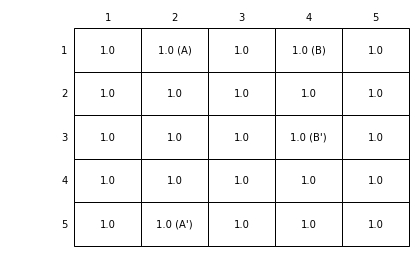

In [85]:
draw_image(image)
plt.show()
plt.close()

基本條件都好了，我們開始來處理範例3.5

In [94]:
def example_3_5():
    # 初始化一個0矩陣
    grids = np.zeros((GRID_SIZE, GRID_SIZE))
    while True:        
        # 迭代計算        
        new_grids = np.zeros_like(grids) # 複製一個格式一樣的zero matrix
        # 從0, 0開始計算每一個action的return，並計錄最大值
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                # 記錄某一個cell的四個action會得到的return
                values = []
                for action in ACTIONS:
                    # 計算四個方向的reward
                    (next_i, next_j), reward = step([i, j], action)
                    # 計算r(s, a, s')的return
                    values.append(reward + GAMMA * grids[next_i, next_j])
                # greedy，最大的那個就是最佳的return
                new_grids[i, j] = np.max(values)
                
#         print(np.sum(np.abs(new_grids - grids)))
        # 當收斂小到一個結果之後就直接停止
        # 如果有興趣也可以在這邊print grids觀察變化
        if np.sum(np.abs(new_grids - grids)) < 1e-4:
#             print(np.round(new_grids, decimals=2))
            draw_image(np.round(new_grids, decimals=2))
            plt.show()
            plt.close()            
            break
        grids = new_grids
#     print(new_grids)
#     print(grids)

[[21.98 24.42 21.98 19.42 17.48]
 [19.78 21.98 19.78 17.8  16.02]
 [17.8  19.78 17.8  16.02 14.42]
 [16.02 17.8  16.02 14.42 12.98]
 [14.42 16.02 14.42 12.98 11.68]]


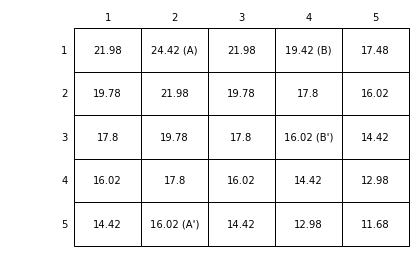

In [95]:
example_3_5()

另外我們希望可以跟書上一樣可以有一個policy的圖表，下面可以設置一個函數來處理

In [128]:
def draw_policy(optimal_values):
    """
    繪製policy
    """
    fig, ax = plt.subplots()
    ax.set_axis_off() # 隱藏圖表的軸線
    tb = Table(ax) # new一個Table object
    
    # 設置表格大小
    nrows, ncols = optimal_values.shape
    width = 1.0 / ncols
    height = 1.0 / nrows
        
    # 函數說明可參考上方
    for (i, j), val in np.ndenumerate(optimal_values):
        #print('index: ', [i, j])
        next_vals = []
        for action in ACTIONS:
            # 只需要下一個state，不需要記錄reward
            next_state, _ = step([i, j], action)  
            #print(f'next_state: {next_state}')
            next_vals.append(optimal_values[next_state[0], next_state[1]])
        
        # 找出最佳的action
        # next_vals == np.max(next_vals)的結果是一個mask，[False, False, False, True]
        # np.where之後取到的就會是True那個index，上面範例就是3
        
        #print(next_vals)
        best_actions = np.where(next_vals == np.max(next_vals))[0]
        #print(best_actions)
        # print(best_actions)
        # 最佳的action可能會有多個，因為多個方向得到一樣的optimal value是有可能的
        # 利用迴圈將所有可能的action的flag串起來
        _action = ''
        for action_idx in best_actions:
            _action += ACTION_FLAGS[action_idx]
        
        # 建立表格
        # 首先一樣，如果是A、A'、B、B'這四個點，就特別加入標識
        if [i, j] == A_LOC:
            _action = str(_action) + " (A)"
        elif [i, j] == A_JUMP_LOC:
            _action = str(_action) + " (A')"
        elif [i, j] == B_LOC:  
            _action = str(_action) + " (B)"
        elif [i, j] == B_JUMP_LOC:    
            _action = str(_action) + " (B')"
        
        tb.add_cell(i, j, width, height, text=_action, loc='center', facecolor='white')
        
    # 幫row、column加入label
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, 
                    text=i+1, loc='right', edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2,
                    text=i+1, loc='center', edgecolor='none', facecolor='none')
    ax.add_table(tb)

修正一下剛才的函數`example_3_5`，加入顯示這個表格

In [129]:
def example_3_5():
    # 初始化一個0矩陣
    grids = np.zeros((GRID_SIZE, GRID_SIZE))
    while True:        
        # 迭代計算        
        new_grids = np.zeros_like(grids) # 複製一個格式一樣的zero matrix
        # 從0, 0開始計算每一個action的return，並計錄最大值
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                # 記錄某一個cell的四個action會得到的return
                values = []
                for action in ACTIONS:
                    # 計算四個方向的reward
                    (next_i, next_j), reward = step([i, j], action)
                    # 計算r(s, a, s')的return
                    values.append(reward + GAMMA * grids[next_i, next_j])
                # greedy，最大的那個就是最佳的return
                new_grids[i, j] = np.max(values)
                
#         print(np.sum(np.abs(new_grids - grids)))
        # 當收斂小到一個結果之後就直接停止
        # 如果有興趣也可以在這邊print grids觀察變化
        if np.sum(np.abs(new_grids - grids)) < 1e-4:
#             print(np.round(new_grids, decimals=2))
            draw_image(np.round(new_grids, decimals=2))
            plt.show()
            plt.close()     
            draw_policy(new_grids)
            plt.show()
            plt.close()                 
            break
        grids = new_grids

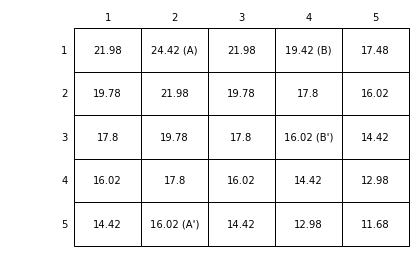

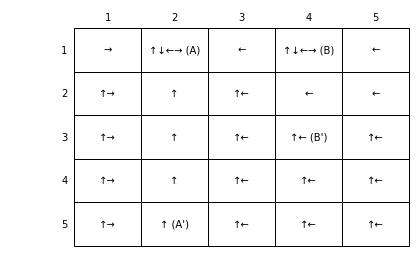

In [130]:
example_3_5()

更多可參考原作者GitHub，在下只是將原作者的程式理解之後加入註解說明